# 🏦 Mini-Projet: Prédiction de Souscription aux Dépôts Bancaires

Auteur: Touati Tasnim

Dataset: https://archive.ics.uci.edu/dataset/222/bank+marketing

## 1. Choix et Exploration de la Dataset

## 1.1 Choix de la Dataset

J'ai choisi le Bank Marketing Dataset pour les raisons suivantes:

* Problème de classification binaire réel: Prédire si un client souscrira à un dépôt à terme

* Dataset non nettoyée: Contient des valeurs manquantes ('unknown'), variables mixtes, déséquilibre de classes

* Problème business concret: Optimisation des campagnes marketing téléphoniques

* Défi technique intéressant: Fort déséquilibre des classes (88.3% vs 11.7%)

* Problème de fuite de données: La variable duration ne peut être utilisée en production

### 1.2 Chargement du Dataset

In [3]:
import os
print(os.getcwd())
print([p for p in os.listdir() if 'bank-additional' in p])

c:\Users\tasst\Downloads
['bank-additional-full.csv']


In [4]:
import pandas as pd

df = pd.read_csv('bank-additional-full.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


### Les caractéristiques:
- **age** : Âge du client.

- **job** : Profession du client.

- **marital** : Situation matrimoniale (marié, célibataire, divorcé).

- **education** : Niveau d'éducation.

- **default** : Indique si le client a un crédit en défaut (oui/non).

- **housing** : Possession d'un prêt immobilier (oui/non).

- **loan** : Possession d'un prêt personnel (oui/non).

- **contact** : Type de contact utilisé pour la campagne (téléphone, mobile, etc.).

- **month** : Mois du dernier contact.

- **day_of_week** : Jour de la semaine du dernier contact.

- **duration** : Durée du dernier appel (secondes).

- **campaign** : Nombre de contacts effectués pendant cette campagne.

- **pdays** : Jours depuis le dernier contact d'une précédente campagne (999 = jamais contacté).

- **previous** : Nombre de contacts avant cette campagne.

- **poutcome** : Résultat de la précédente campagne (succès, échec, autre).

- **emp.var.rate** : Taux de variation de l'emploi.

- **cons.price.idx** : Indice des prix à la consommation.

- **cons.conf.idx** : Indice de confiance des consommateurs.

- **euribor3m** : Taux Euribor à 3 mois.

- **nr.employed** : Nombre d'employés dans le secteur.

- **y** : Réponse du client à la campagne (oui/non).


### 1.3 Exploration initiale


In [5]:
#Dimensions
df.shape

(41188, 21)

La dataset contient **41 188 lignes** et **21 colonnes**, ce qui en fait une dataset de taille suffisante pour entraîner un modèle de classification fiable.


In [6]:
#Types de colonnes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

* On observe **11 colonnes catégorielles** et **10 colonnes numériques**.


* Aucune valeur manquante n'est indiquée (Non-Null = 41 188 pour toutes les colonnes) ; cependant, plusieurs colonnes contiennent la chaîne **"unknown"** qui représente en réalité des valeurs manquantes déguisées.


In [7]:
print(df.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [8]:
# Vérification des valeurs 'unknown'
(df == "unknown").sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

La dataset ne contient pas de valeurs manquantes au sens pandas (pas de NaN), mais elle contient des valeurs **"unknown"** qui représentent des informations non renseignées.
Ces valeurs apparaissent dans plusieurs colonnes :

* job : 330 fois

* marital : 80 fois

* education : 1731 fois

* default : 8597 fois

* housing : 990 fois

* loan : 990 fois

Cela confirme que la dataset **n’est pas propre** et nécessite **un prétraitement**.

In [9]:
#Statistique descriptives
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.019010
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.178074
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4964.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.000000


Analyse exploratoire des données

**1. Profil des clients**
- **Âge** : majoritairement **32-47 ans** (médiane 38 ans).

- Clientèle **adulte**, quelques valeurs extrêmes (jusqu'à 98 ans).

**2. Interactions avec la campagne**

- **Durée moyenne des appels** : **258 s**, avec quelques valeurs très élevées.

- **Contacts par campagne** (`campaign`) : la plupart des clients ont été contactés **1-3 fois**, certains jusqu'à **56**.

- `previous` tres **faible** et `pdays` souvent **999** -> la plupart des clients n'avaient jamais été contactés.

**3. Variables économiques**

- `emp.var.rate` : variation de l’emploi, moyenne proche de 0 mais fluctue de -3,4 à 1,4.
- `euribor3m` taux Euribor 3 mois, moyenne 3,62 %, forte dispersion, `nr.employed` stable (~5167).

- Contexte économique peut influencer la réponse.

**4. Distributions et anomalies**

- `pdays` = 999 codifie “jamais contacté”, attention aux valeurs extrêmes.

- `duration` contient des valeurs extrêmes qui peuvent influencer les modèles si elles ne sont pas traitées.

**5. Insights pour la classification**

- **Variables clés** : `duration`, `age`, `campaign`, `previous`, `emp.var.rate`, `euribor3m`.

- **Variables stables** (`cons.price.idx`, `nr.employed`) fournissent un contexte mais peu de variance.

**Conclusion**

- Clients majoritairement nouveaux et adultes.

- Prévoir un traitement des valeurs extrêmes pour éviter les biais.

- Combiner variables démographiques, économiques et engagement pour prédire la réponse.

### 1.4 Visualisation:

Note: you may need to restart the kernel to use updated packages.


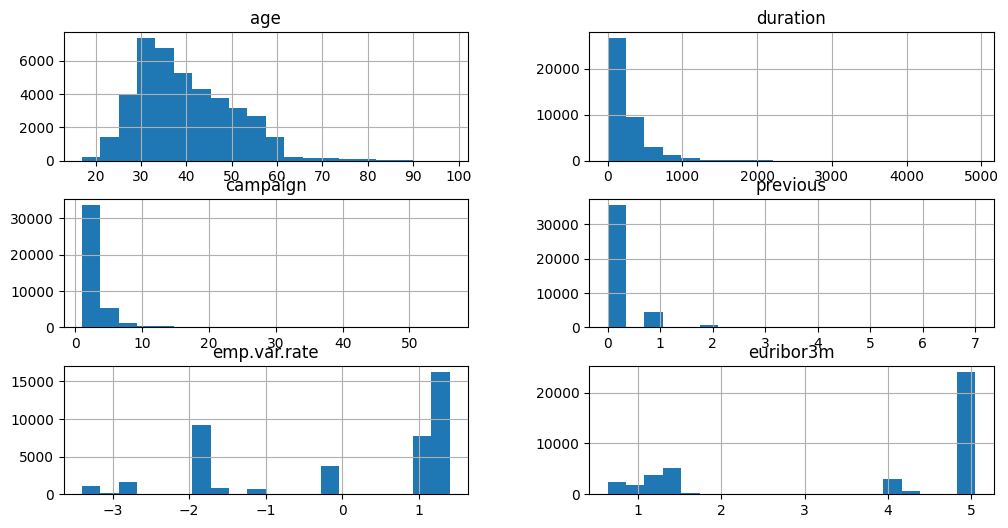

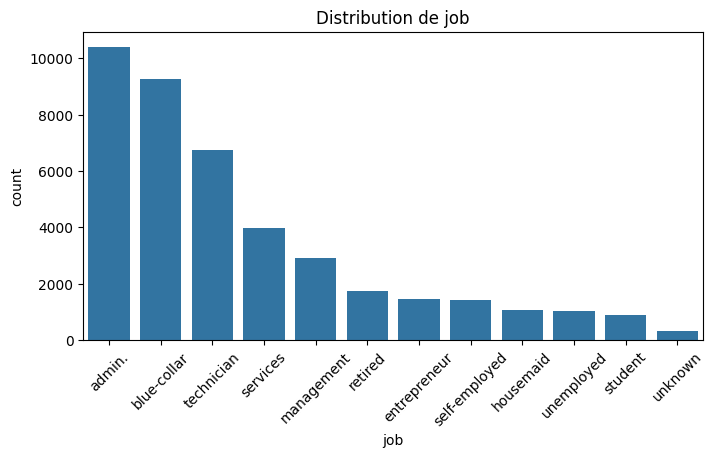

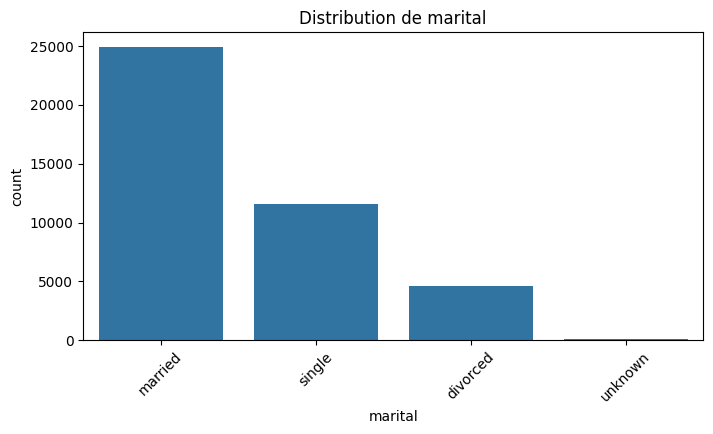

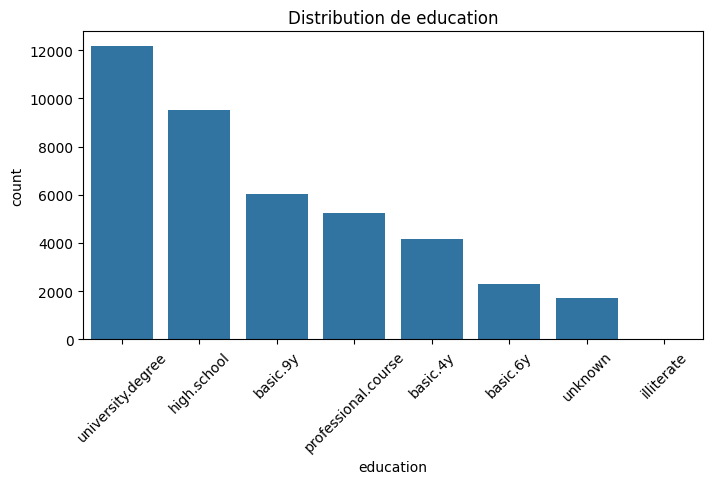

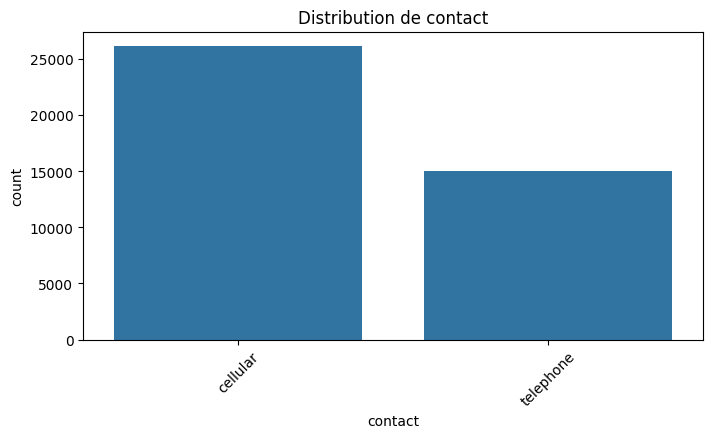

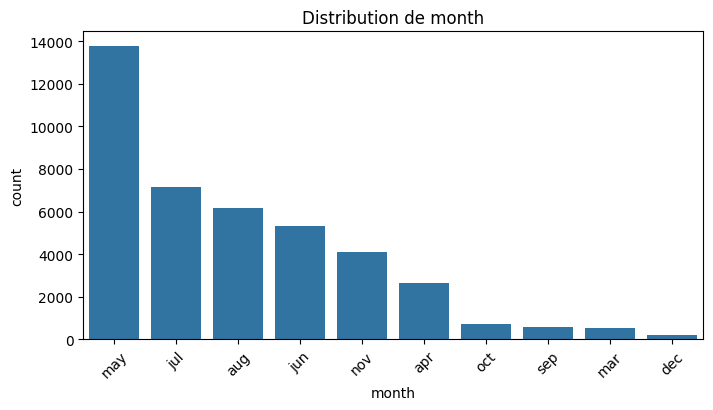

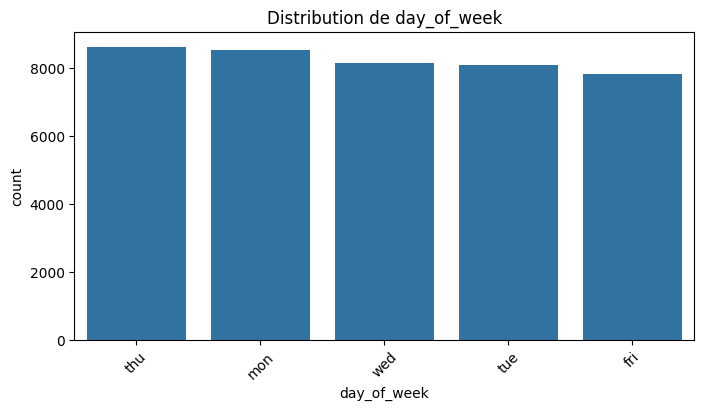

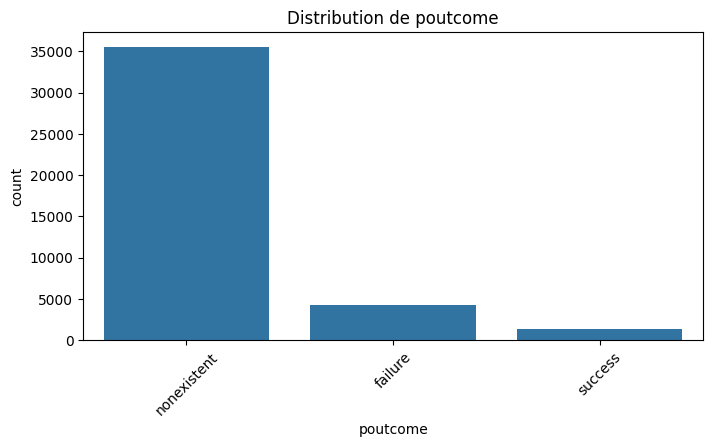

In [10]:
# 1. Distributions des variables
%pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

# Histogrammes numériques
num_cols = ['age','duration','campaign','previous','emp.var.rate','euribor3m']
df[num_cols].hist(bins=20, figsize=(12,6))
plt.show()

# Barplots catégorielles
cat_cols = ['job','marital','education','contact','month','day_of_week','poutcome']
for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution de {col}')
    plt.xticks(rotation=45)
    plt.show()

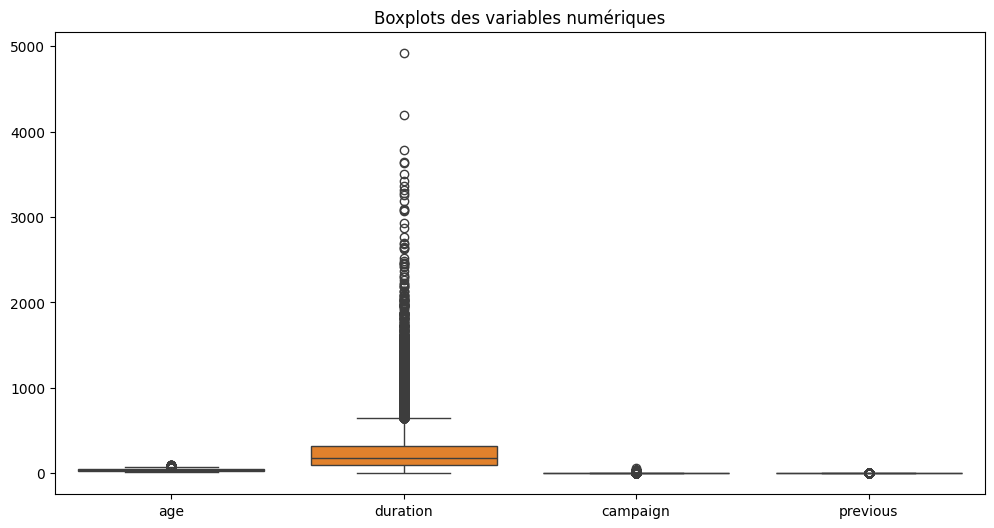

In [11]:
# 2. Valeurs extrêmes (outliers)
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['age','duration','campaign','previous']])
plt.title("Boxplots des variables numériques")
plt.show()

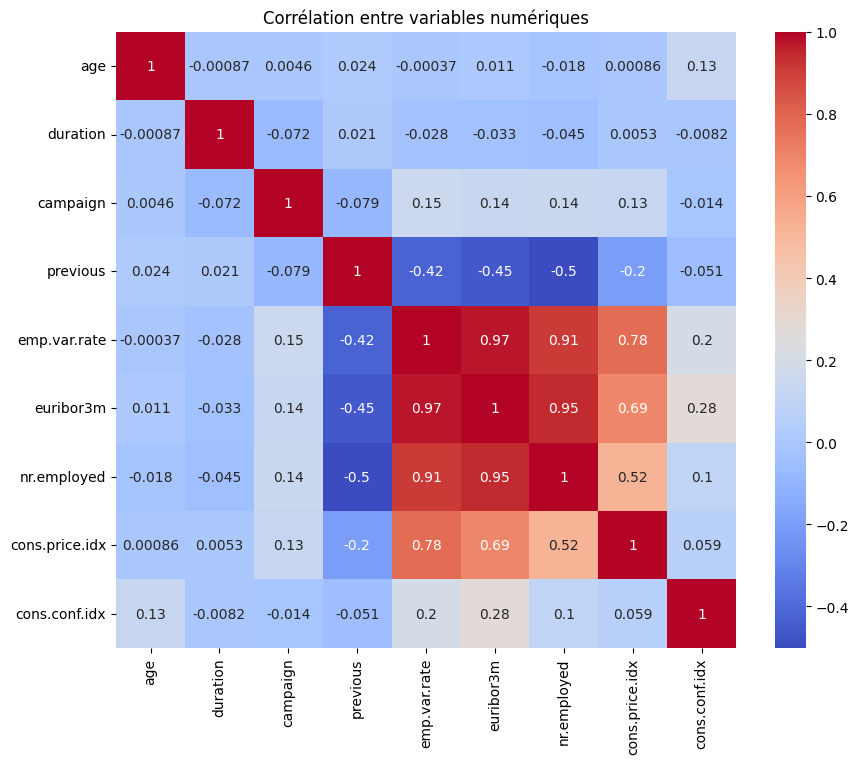

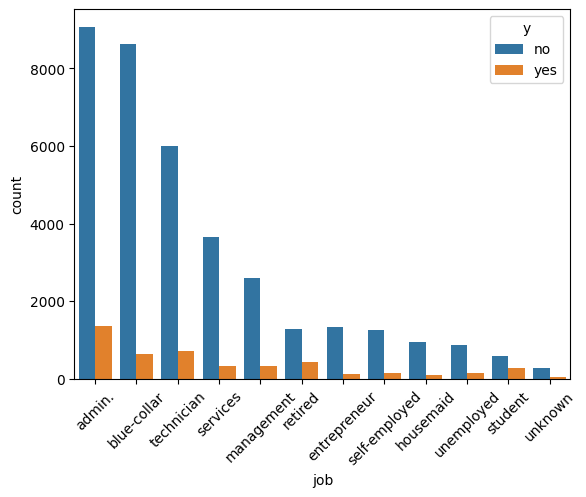

In [12]:
# Relations entre les variables
# Heatmap de corrélation pour voir les relations entre variables numériques.
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols + ['nr.employed','cons.price.idx','cons.conf.idx']].corr(), annot=True, cmap='coolwarm')
plt.title("Corrélation entre variables numériques")
plt.show()

#Cross-tab / countplot pour certaines variables catégorielles vs y (réponse à la campagne) :

sns.countplot(data=df, x='job', hue='y', order=df['job'].value_counts().index)
plt.xticks(rotation=45)
plt.show()

#### Interprétation de la heatmap de corrélation
- Forte multicolinéarité : emp.var.rate, euribor3m, nr.employed (>0.9) — indicateurs économiques liés.
- Faibles corrélations pour age, duration, campaign — pas de redondance majeure.
- Implication : SVM RBF est **robuste à la multicolinéarité** grâce au noyau qui projette les données dans un espace de haute dimension où les distances sont calculées de façon non linéaire. La régularisation via `C` suffit.

#### Interprétation du graphique 'job' vs 'y'
- Les jobs les plus fréquents : admin., blue-collar, technician.
- Taux de "yes" élevé chez retired et student (proportion orange visible malgré faible volume).
- Implication : Encoder 'job' en one-hot était essentiel ; ces catégories sont prédictives.

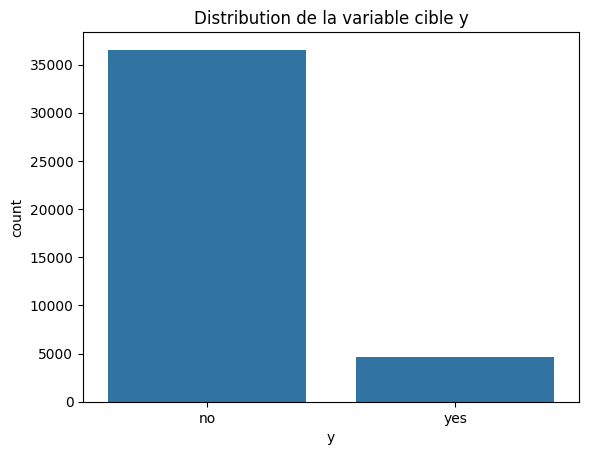

In [13]:
# 4. Déséquilibre de la cible
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='y')
plt.title("Distribution de la variable cible y")
plt.show()

## 2. Nettoyage et Prétraitement (Preprocessing)


In [14]:
# suppression des doublons
df = df.drop_duplicates()

In [15]:
# Identifier les colonnes avec "unknown"
cols_with_unknown = ['job','marital','education','default','housing','loan']

# Vérifier le nombre de "unknown" par colonne
for col in cols_with_unknown:
    print(f"{col} : {(df[col]=='unknown').sum()} valeurs 'unknown'")


job : 330 valeurs 'unknown'
marital : 80 valeurs 'unknown'
education : 1730 valeurs 'unknown'
default : 8596 valeurs 'unknown'
housing : 990 valeurs 'unknown'
loan : 990 valeurs 'unknown'


Pour certaines variables catégorielles telles que `job` et `education`, la valeur `"unknown"` peut être considérée comme une information manquante implicite.
Il serait possible d'appliquer une stratégie d'imputation plus avancée, par exemple en exploitant des variables explicatives comme l'âge, des groupes d'âge ou le niveau d'éducation, afin d'inférer une valeur plus plausible à partir de profils similaires.
Cependant, dans le cadre de ce mini-projet de classification, ces valeurs `"unknown"` représentent **une proportion limitée des données** pour certaines variables (notamment job), et la mise en œuvre de telles méthodes augmenterait la complexité du prétraitement sans gain significatif attendu sur les performances du modèle.
Ainsi, afin de conserver un pipeline simple, lisible et reproductible, les valeurs `"unknown"` ont été remplacées par **la modalité la plus fréquente** de chaque variable concernée, ce qui constitue un compromis raisonnable entre qualité des données et simplicité du modèle.
Remarque : pour des colonnes comportant un grand nombre dentrées `"unknown"` (ex. `default`), il peut être préférable de conserver `"unknown"` comme modalité séparée ou d'explorer une imputation basée sur un modèle plutôt que de remplacer systématiquement par le mode.

In [16]:
cols_with_unknown = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Remplacement des 'unknown' par la modalité la plus fréquente (mode)
for col in cols_with_unknown:
    mode_value = df[col][df[col] != 'unknown'].mode()[0]
    df[col] = df[col].replace('unknown', mode_value)

In [17]:
(df[cols_with_unknown] == 'unknown').sum()

job          0
marital      0
education    0
default      0
housing      0
loan         0
dtype: int64

In [18]:
# 2. Encodage des variables catégorielles (1)
#mois
month_dict = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

df['month'] = df['month'].str.strip().str.lower().map(month_dict)

# Jours
day_dict = {
    'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5
}

df['day_of_week'] = df['day_of_week'].map(day_dict)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,no,no,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


Nous distinguons deux types de variables catégorielles :

* **Variables nominales** (sans ordre naturel) : job, marital, education, default, housing, loan, contact, poutcome
→ Encodées en **one-hot** pour éviter la multicolinéarité et permettre au modèle de traiter correctement les catégories sans imposer d'ordre.

* **Variables ordinales ou cycliques avec sens chronologique** :

**month** : mappée de **'jan'=1 à 'dec'=12**. Cela permet au modèle de capturer des tendances linéaires sans ajouter 9 colonnes inutiles.

 **day_of_week** : mappée de **'mon'=1 à 'fri'=5**.

# 4. Modèle
#### Sélection du modèle : Support Vector Machine (SVM) avec noyau RBF

Nous avons choisi le modèle **SVM (Support Vector Machine)** pour plusieurs raisons :

#### Justification du choix

Le dataset Bank Marketing présente les caractéristiques suivantes qui orientent fortement vers le SVM :

- **Gestion du déséquilibre** : avec une classe minoritaire importante ("yes" ≈ 11.3 %, "no" ≈ 88.7 %). L’option `class_weight='balanced'` ajuste automatiquement les pénalités des classes minoritaires et majoritaires.
- **Nombre de features modéré** (~36 après encodage) et mélange de variables numériques et catégorielles encodées.
- **Relations probablement non linéaires** entre les variables et la cible : par exemple, l'effet de la durée d'appel (`duration`) est très fort mais combiné de façon complexe avec `poutcome`, `month`, `contact`, etc. Un modèle linéaire serait trop limité.
- **Présence de bruit et d'outliers** dans certaines variables (ex. `duration`, `campaign`).

In [19]:
df_encoded = pd.get_dummies(df, columns=['job','marital','education','default','housing','loan','contact','poutcome'], drop_first=True)

In [20]:
# 4. Préparation des features (X) et target (y)
df_encoded['y'] = df_encoded['y'].map({'no': 0, 'yes': 1})  # Convert to binary

X = df_encoded.drop('y', axis=1)  # All features
y = df_encoded['y']

print(f"Shape de X: {X.shape}")
print(f"Répartition des classes:\n{y.value_counts(normalize=True)}")

Shape de X: (41176, 36)
Répartition des classes:
y
0    0.887337
1    0.112663
Name: proportion, dtype: float64


In [21]:
# installer scikit-learn si nécessaire
%pip install scikit-learn

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify preserves imbalance ratio
)

print(f"Train size: {X_train.shape[0]}, Test size: {X_test.shape[0]}")

Note: you may need to restart the kernel to use updated packages.
Train size: 32940, Test size: 8236


La normalisation des variables est cruciale pour le modele SVM.

Après l'encodage des variables catégorielles, le Dataset contient un mélange de caractéristiques avec des échelles très différentes :

Les variables numériques comme age (17-95), campaign (1–56), pdays (0–999) ou duration (0 à plusieurs milliers) ont des plages très différentes.

Les variables encodées en LabelEncoding sont binaires (0 ou 1).
Le SVM avec noyau RBF calcule des distances euclidiennes entre les points :

                              k(x,x') = exp(-𝛾∥x-x'∥²)

Si les variables ne sont pas mises à l'échelle, celles avec de grandes valeurs (par exemple duration) domineront le calcul des distances, tandis que les variables à plus petite échelle seront pratiquement ignorées. Cela entraîne une perte de sensibilité du noyau et donc une performance sous-optimale du modèle.

La mise à l'échelle transforme chaque variable pour qu'elle ait **une moyenne nulle** et un **écart-type = 1**, garantissant que toutes les variables contribuent équitablement à la mesure de distance.

Sans cette normalisation, le SVM peut converger lentement ou produire des hyperplans sous-optimaux.

In [22]:
# 5. Mise à l'échelle des variables numériques (seulement sur le train !)
from sklearn.preprocessing import StandardScaler

num_cols = ['age', 'duration', 'campaign', 'previous',
            'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
            'euribor3m', 'nr.employed', 'month', 'day_of_week']
# NB: nous allons normalisr 'month' et 'day_of_week' vue que'elles sont numériques aussi.

scaler = StandardScaler()

# Fit on train only
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

# Apply same transformation to test (no fit!)
X_test[num_cols] = scaler.transform(X_test[num_cols])

#### Pourquoi fitter le scaler **uniquement sur le jeu d'entraînement** ?
C'est la partie la plus importante : **éviter le data leakage** (fuite d'information).

- `StandardScaler` calcule deux statistiques sur les données : la **moyenne** et l'**écart-type** de chaque colonne.
- Si nous calculions ces statistiques sur **l'ensemble du dataset** (train + test) avant la séparation :
  - La moyenne et l'écart-type incluraient des informations provenant des échantillons de test.
  - Le modèle serait indirectement "informé" de la distribution des données de test pendant l'entraînement.
  - Les performances sur le jeu de test apparaîtraient **artificiellement meilleures** qu'elles ne le seraient en réalité.

In [23]:
# 6. Entraînement du modèle SVM
from sklearn.svm import SVC

svm = SVC(
    kernel='rbf',              # Type de noyau
    class_weight='balanced',   # Gestion du déséquilibre des classes
    C=1.0,                     # Paramètre de régularisation
    gamma='scale',             # Paramètre du noyau RBF
    random_state=42            # Reproductibilité
)

svm.fit(X_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",'balanced'
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


Justification des choix d'hyperparamètres :

- kernel='rbf' : indispensable pour modéliser les interactions non linéaires observées.

- class_weight='balanced' : solution intégrée et robuste au déséquilibre, évite le rééchantillonnage et ses risques.

- C=1.0 et gamma='scale' : valeurs par défaut solides pour un premier modèle. Elles offrent un bon équilibre sans tuning préalable.

- random_state=42 : garantit la reproductibilité.

### 4. Évaluation du Modèle Initial (SVM avec noyau RBF)



In [24]:
# Évaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = svm.predict(X_test)
y_prob = svm.decision_function(X_test)  # For AUC

print("Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report :")
print(classification_report(y_test, y_pred, target_names=['no', 'yes']))

print(f"\nAUC-ROC: {roc_auc_score(y_test, y_prob):.4f}")

Matrice de confusion :
[[7187  121]
 [ 741  187]]

Classification Report :
              precision    recall  f1-score   support

          no       0.91      0.98      0.94      7308
         yes       0.61      0.20      0.30       928

    accuracy                           0.90      8236
   macro avg       0.76      0.59      0.62      8236
weighted avg       0.87      0.90      0.87      8236


AUC-ROC: 0.9034


#### Matrice de confusion

- **True Negatives (TN)** : 7187 → Bonne détection des clients qui ne souscrivent pas.
- **False Positives (FP)** : 121 → Fausses alertes limitées (le modèle n'est pas trop agressif).
- **False Negatives (FN)** : 741 → Nombre important de clients potentiels manqués.
- **True Positives (TP)** : 187 → Seulement 187 clients qui souscrivent sont correctement identifiés.

#### Classification Report

- **Accuracy globale** : **90 %**  
  Valeur élevée mais **trompeuse** en raison du fort déséquilibre (~88 % de "no"). Un modèle naïf prédisant toujours "no" obtiendrait déjà ~88 %.

- **Classe majoritaire ("no")** : Performances excellentes (recall 0.98, F1 0.94) → comme attendu.

- **Classe minoritaire ("yes") – objectif principal** :
  - **Precision = 0.61** : Quand le modèle prédit "yes", il a raison dans 61 % des cas → acceptable (campagne ciblée relativement efficace).
  - **Recall = 0.20** : Seulement 20 % des vrais souscripteurs sont détectés → **point faible majeur** (beaucoup d'opportunités manquées).
  - **F1-score = 0.30** : Faible, reflétant la difficulté à équilibrer precision et recall sur la classe positive.

#### AUC-ROC : **0.9034**

- Valeur **excellente** (> 0.90).
- Indique une **très bonne capacité de discrimination globale** du modèle : il attribue généralement des scores plus élevés aux vrais "yes" qu'aux "no".
- La performance est robuste indépendamment du seuil de classification.

#### Interprétation globale et contexte métier

- **Initial (SVM par défaut)** :
  - Accuracy : **0.90** (attention : influencée par le fort déséquilibre des classes).
  - Classe 'no' : précision **0.91**, rappel **0.98**, F1 **0.94**.
  - Classe 'yes' : précision **0.61**, rappel **0.20**, F1 **0.30** → **faible rappel** : de nombreux souscripteurs ne sont pas détectés.
- **Remarque** : l'AUC-ROC élevée (**0.9034**) indique une bonne capacité de discrimination globale ; néanmoins, en contexte marketing il peut être préférable d'augmenter le rappel via tuning d'hyperparamètres, ajustement du seuil ou rééchantillonnage.

### 7. Optimisation des hyperparamètres avec GridSearchCV

Le modèle initial montre un bon AUC mais un recall faible sur la classe "yes".  
Nous lançons une recherche par grille pour optimiser `C`, `gamma` et le type de noyau, en maximisant le **F1-score** (métrique adaptée au déséquilibre).

In [25]:
# 7.1 GridSearchCV pour optimisation des hyperparamètres
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(
    estimator=SVC(class_weight='balanced', random_state=42),  # kernel='rbf' par défaut dans l'estimator
    param_grid=param_grid,
    scoring='f1',          # Optimisation sur F1-score global (priorité à la classe minoritaire)
    cv=3,                  # Validation croisée à 3 folds pour limiter le temps
    n_jobs=-1,             # Utilisation de tous les cœurs
    verbose=1
)

In [27]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",SVC(class_wei...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.1, 1, ...], 'gamma': [0.01, 0.1, ...], 'kernel': ['rbf', 'linear']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is als

In [28]:
best_model = grid_search.best_estimator_
print("Meilleurs paramètres trouvés:", grid_search.best_params_)

Meilleurs paramètres trouvés: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


### 7.2 Évaluation du modèle optimisé

In [29]:
# Évaluation du meilleur modèle issu de GridSearchCV
best_model = grid_search.best_estimator_

# Faites des prédictions sur l'ensemble de test
y_pred = best_model.predict(X_test)

print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("Rapport de classification :\n", classification_report(y_test, y_pred))

Matrice de confusion :
 [[6215 1093]
 [  74  854]]
Rapport de classification :
               precision    recall  f1-score   support

           0       0.99      0.85      0.91      7308
           1       0.44      0.92      0.59       928

    accuracy                           0.86      8236
   macro avg       0.71      0.89      0.75      8236
weighted avg       0.93      0.86      0.88      8236



| Métrique | Modèle Initial (SVM) | Modèle Optimisé (GridSearchCV) |
|---|---:|---:|
| Accuracy | 0.90 | 0.86 |
| Precision (classe 'yes') | 0.61 | 0.44 |
| Recall (classe 'yes') | 0.20 | 0.92 |
| F1-score (classe 'yes') | 0.30 | 0.59 |

- L’optimisation par GridSearchCV améliore nettement le rappel de la classe minoritaire (de 0.20 → 0.92) au prix d'une baisse de la précision.
- Ajuster le seuil de décision permet de trouver un compromis précision/rappel adapté au coût métier des faux positifs vs faux négatifs.

#### Interprétation métier
- Avec le modèle optimisé, la banque détectera **≈92 %** des clients susceptibles de souscrire (rappel ≈ 0.92).
- La précision de 0.44 signifie qu'environ 44 % des clients contactés suite à une prédiction 'yes' souscriront réellement.
- Ce compromis peut être jugé rentable selon le coût d'un appel non converti; l'ajustement du seuil permet d'optimiser ce trade-off.

#### Limites et pistes d'amélioration futures
- Tester le réglage du seuil (threshold tuning), des méthodes de rééchantillonnage (SMOTE), et du feature engineering pour améliorer précision et F1.

### 6. Ajustement du seuil de décision (Threshold Tuning)

Le modèle final (issu de GridSearchCV : C=1, gamma=0.1) donne déjà d'excellentes performances :
- Recall "yes" = 91–92 %
- F1-score "yes" ≈ 0.59

Après l’optimisation des hyperparamètres à l’aide de la technique Grid Search, le modèle SVM est réentraîné en utilisant la meilleure combinaison de paramètres trouvée.


In [30]:
from sklearn.svm import SVC

# Paramètres optimaux obtenus par Grid Search
best_params = {'C': 10, 'kernel': 'rbf', 'gamma': 0.1}

model = SVC(**best_params, probability=True)  # probability=True needed for decision_function / predict_proba
model.fit(X_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",10
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",0.1
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",True
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


### 6.2 Calcul des probabilités de prédiction

Afin d’ajuster le seuil de décision, il est nécessaire de disposer des probabilités associées à la classe positive (classe 1) plutôt que des prédictions binaires directes.

Le modèle SVM, entraîné avec l’option probability=True, permet de calculer ces probabilités à l’aide de la méthode predict_proba.

In [31]:
y_probs = model.predict_proba(X_test)[:, 1]

- 'predict_proba(X_test)' retourne, pour chaque observation, la probabilité d’appartenir à chaque classe.

- La première colonne correspond à la probabilité de la **classe 0** (non intéressé).

- La seconde colonne '([:, 1])' correspond à la probabilité de la **classe 1** (client intéressé).

- Le vecteur y_probs contient donc, pour chaque client, un score de probabilité utilisé pour l’ajustement du seuil de décision.

### 6.3 Recherche du seuil de décision optimal

Afin d’optimiser les performances du modèle pour la classe minoritaire, une recherche du seuil de décision optimal est effectuée.

L’objectif est de sélectionner le seuil qui maximise le F1-score, métrique adaptée aux jeux de données déséquilibrés.

In [32]:
import numpy as np
from sklearn.metrics import f1_score

thresholds = np.arange(0.1, 0.9, 0.01)
best_f1 = 0
best_thresh = 0.5

for t in thresholds:
    y_pred_t = (y_probs >= t).astype(int)
    f1_t = f1_score(y_test, y_pred_t)
    if f1_t > best_f1:
        best_f1 = f1_t
        best_thresh = t

print(f"Optimal threshold: {best_thresh:.2f}, F1-score: {best_f1:.2f}")

Optimal threshold: 0.19, F1-score: 0.61


- Une plage de seuils allant de 0.1 à 0.9 est testée avec un pas de 0.01.

- Pour chaque seuil t, les probabilités sont transformées en prédictions binaires :

    - Classe 1 si probabilité ≥ t

    - Classe 0 sinon

- Le F1-score est calculé pour chaque seuil.

- Le seuil maximisant le F1-score est sélectionné comme seuil optimal.

- Cette approche permet d’ajuster finement le compromis entre précision et rappel selon les objectifs métier.

### 6.4 Évaluation du modèle avec le seuil optimal

Une fois le seuil de décision optimal identifié, le modèle est réévalué afin de mesurer son impact sur les performances de classification, en particulier pour la classe minoritaire.

In [33]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

y_pred_opt = (y_probs >= best_thresh).astype(int)
precision = precision_score(y_test, y_pred_opt)
recall = recall_score(y_test, y_pred_opt)
cm = confusion_matrix(y_test, y_pred_opt)

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}")
print("Confusion matrix:\n", cm)

Precision: 0.54, Recall: 0.70
Confusion matrix:
 [[6754  554]
 [ 276  652]]


### 6.5 Choix final du seuil de décision

Après l’optimisation des hyperparamètres par Grid Search, un ajustement du seuil de décision a été effectué afin d’optimiser le F1-score de la classe minoritaire.
Le seuil optimal identifié est **0.19**, permettant d’augmenter le F1-score (0.59 → 0.61) et la précision (0.44 → 0.54), au prix d’une baisse modérée du rappel (0.92 → 0.70).
Ce compromis est jugé pertinent dans un contexte de campagne marketing, où la réduction des faux positifs permet de diminuer les coûts opérationnels tout en conservant une capacité satisfaisante de détection des clients intéressés.

### Pourquoi pas 0.5?

Le seuil 0.5 favorise excessivement le rappel au détriment de la précision. L’ajustement du seuil permet d’aligner les prédictions du modèle avec les contraintes métier et d’optimiser une métrique plus adaptée aux données déséquilibrées.

### Interprétation métier
- **Avant**

    - Contacter beaucoup de clients

    - Manquer très peu de clients réellement intéressés

    - Gaspiller des ressources sur de nombreux clients non intéressés

- **Après** (seuil = 0,19)

    - Contacter moins de clients

    - Meilleur taux de conversion (54 % au lieu de 44 %)

    - Certains clients réellement intéressés ne sont pas détectés

**Règle de décision** 

| Priorité métier           | Meilleur choix | 
|--------------------|---------------|
| Maximiser la détection            | Seuil = 0,5 |
| Réduire le coût de la campagne  | Seuil = 0,19          |
|Stratégie équilibrée     | Seuil = 0,19          | 

## 7. Conclusion 

L’optimisation du modèle SVM par Grid Search et l’ajustement du seuil de décision ont permis d’améliorer le F1-score et la précision de la classe minoritaire tout en maintenant un rappel satisfaisant.

Le modèle final (seuil = 0,19) offre un compromis optimal précision–rappel, adapté à une campagne marketing ciblée : il détecte efficacement les clients intéressés tout en réduisant les faux positifs et les coûts associés.

Des améliorations futures pourraient passer par le feature engineering, le rééquilibrage des classes ou l’utilisation de modèles ensemblistes pour accroître la précision.